# HR Analytics Project- Understanding the Attrition in HR 

**Problem Statement:** A major problem in high employee attrition is its cost to an organization. We are analyzing different factors contribute to high attrition rate. We have a dataset of the HR department of IBM with 35 different features of 1470 samples. 

Target variable is assumed to be column 'Attrition', which is a categorical variable. So initial hypothesis is to be Classification problem. 

Individual distribution of each variable would be analysed, as well as the relation with target variable will be plotted.

#### Identifying type: 
Target variable identified as column: 'Attrition', which says whether the employee is staying or leaving the company.
Target variable consists of data 'YES' for employees who are staying and 'NO' for employees who are leaving. This is a classic case of Binary Classification and hence Logistic Regression algorithm best suits.
However we will apply classification algorithms such as DecisionTree Classifier, RandomForest Classifier and SVM to verify best predicted model as per initial hypothesis.

### IMPORTING REQUIRED LIBRARIES

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

### LOADING DATA  

In [142]:
#loading data saved in .csv format
df= pd.read_csv("HR_attrition_data.csv")
df=pd.DataFrame(data=df)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [143]:
# data size
df.shape

(1470, 35)

In [144]:
# Columns present in data
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [145]:
# lets check the data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [146]:
# statistical information about the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


***OBSERVATIONS***
1. Count value is constant, assuming no null values.  
2. Daily wages per employee ranges from Rs.102 to 1500.00, where as hourly rate from Rs.65 to 100.00    
3. Standard hours of work is 80 hours for all employees.  
4. Average age is 36; ranges from 18-60yrs.  
5. All other features have values ranges from minimum to maximum , which will be analysed further.

### EDA
**UNIVARIATE ANALYSIS**

<AxesSubplot:ylabel='Attrition'>

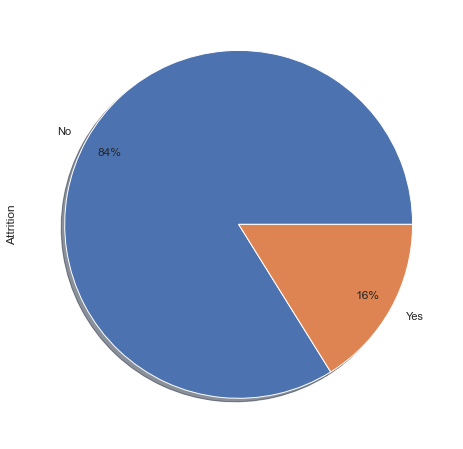

In [147]:
# Analysing data distribution of each variable.
plt.figure(figsize=(10,8))
df['Attrition'].value_counts().plot(kind='pie',shadow=True,autopct='%0.f%%',pctdistance=0.85)

From the pie chart, 16% of HR employees due to various reasons wants to move out of the organizaton and majority 84% would like to stay.

In [148]:
# Lets create count variable for all categorical variables.
#Listing all categorical variables, which we will be analysing with countplot.
cat_var=df.select_dtypes(include=np.object)
cat_var.dtypes

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [149]:
# Return the tuple feature_num with index number
list(enumerate(cat_var))

[(0, 'Attrition'),
 (1, 'BusinessTravel'),
 (2, 'Department'),
 (3, 'EducationField'),
 (4, 'Gender'),
 (5, 'JobRole'),
 (6, 'MaritalStatus'),
 (7, 'Over18'),
 (8, 'OverTime')]

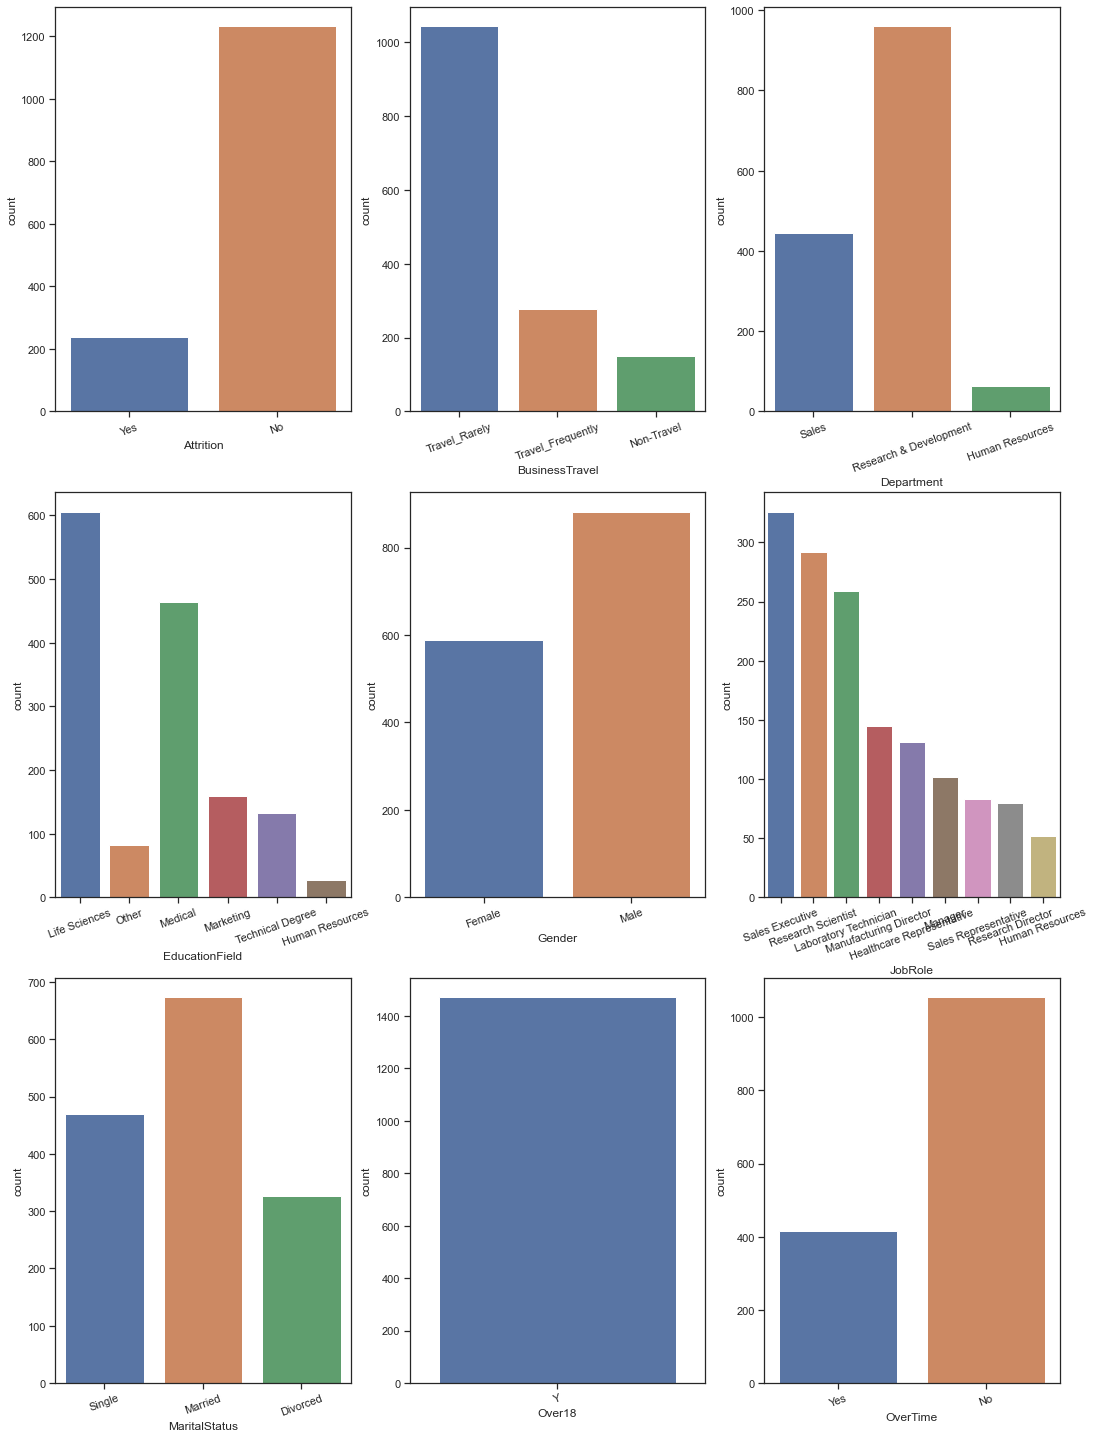

In [150]:
# created a for loop to plot (count plot) all categorical variables.
plt.figure(figsize=(18,70))
for i in enumerate(cat_var):
    plt.subplot(8,3,i[0]+1)
    sns.countplot(i[1],data=df)
    plt.xticks(rotation=20)

***OBSERVATIONS:***   
    1.Majority of the emloyees travel rarely, frequent travellers and non travellers are almost equal and very low in number.  
    2.Highest number of employees are in Research & development, then comes sales and least of all in HR.  
    3.Male employees are over 900(~1000) and female employees less than 600.  
    4.More than 400 employees are sales dept and the lowest in HR dept.  
    5.considering overtime, more than 1000 officers does overtime whereas near to 400 doesn't.  

array([[<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>],
       [<AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>],
       [<AxesSubplot:title={'center':'YearsSinceLastPromotion'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:>]], dtype=object)

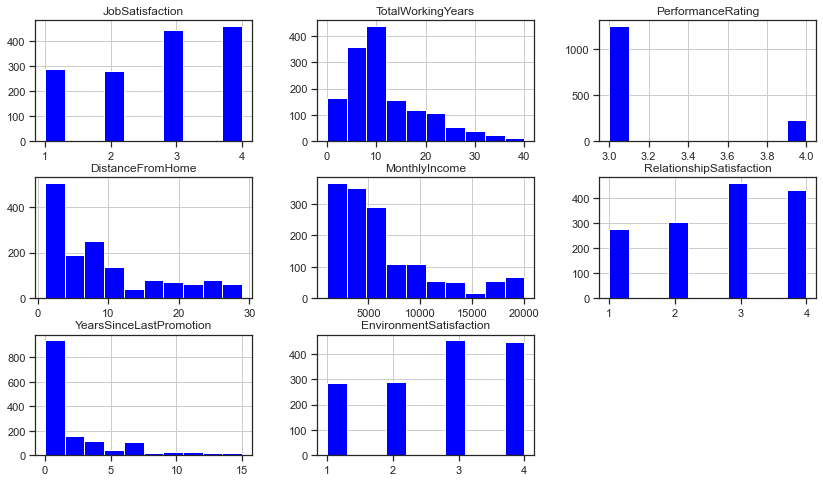

In [131]:
# Distribution plots for some numerical features.
num_var=['JobSatisfaction','TotalWorkingYears','PerformanceRating','DistanceFromHome','MonthlyIncome', 'RelationshipSatisfaction','YearsSinceLastPromotion','EnvironmentSatisfaction']
df[num_var].hist(figsize=(14,8), color='blue')

***OBSERVATIONS:***  
    1.Majority rated 3 and 4 for job satisfaction.  
    2.Most of the employees have long length of service which supports the work atmosphere in the company.  
    3.Performance rating and Relationship satisfaction is average rated.  
    4.Large number of employees received promotion less than 1.5yrs.  

#### BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

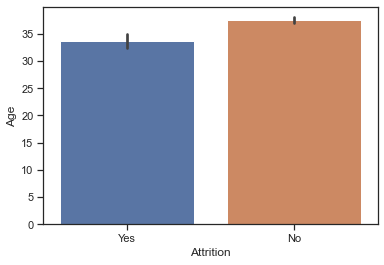

In [132]:
sns.set_theme(style="ticks", color_codes=True)

sns.barplot(x="Attrition", y="Age", data=df)

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

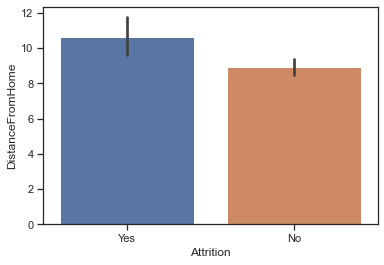

In [133]:
sns.barplot(x="Attrition", y="DistanceFromHome", data=df)

<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

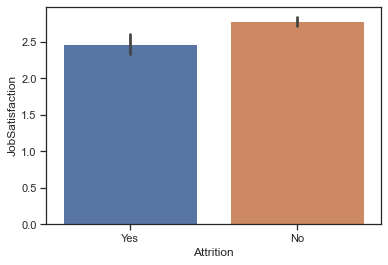

In [134]:
sns.barplot(x="Attrition", y="JobSatisfaction", data=df)

#### MULTIVARIATE ANALYSIS

<AxesSubplot:>

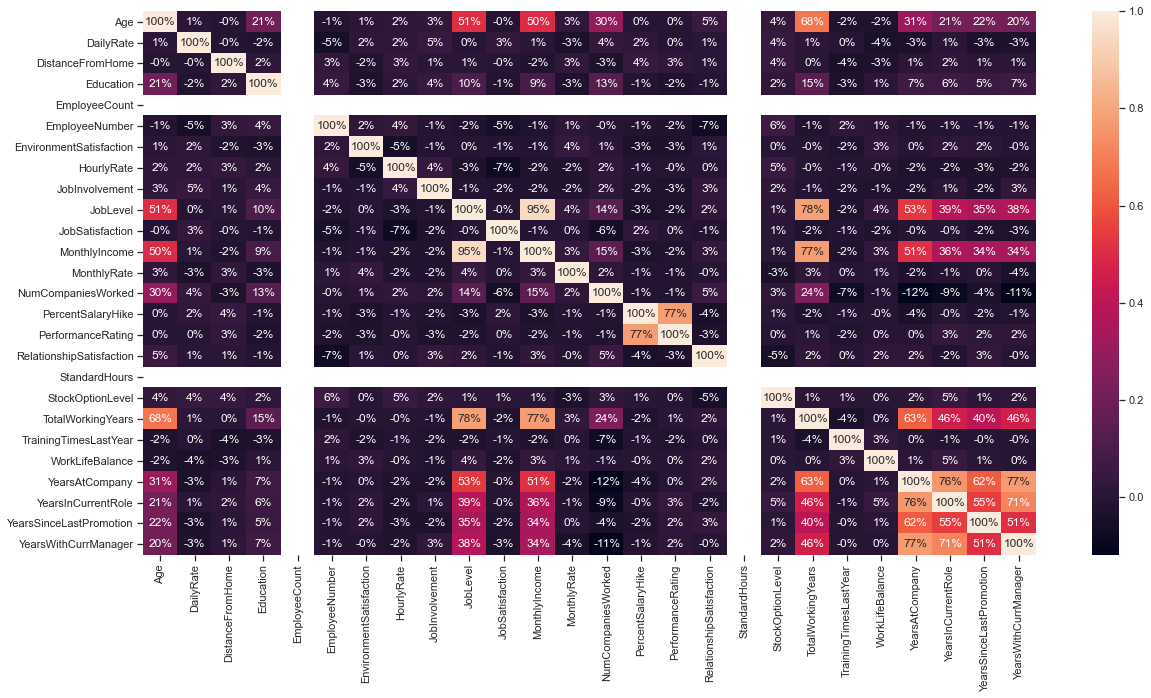

In [135]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, fmt='.0%')

***OBSERVATION:***  
 1. Total working years is positively correlated with Age(68%),Monthly income(77%),and joblevel(78%).  
 2. Monthly income has highest correlation with joblevel (95%).  

### DATA CLEANING

In [136]:
# Handling missing values
# there is no missing values observed.
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [137]:
# Checking skewness 
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [138]:
# We can see skewness in the dataset. Skewness can be removed by power_transform function.

In [139]:
# As we can see some of the columns are irrelevant to target variable as there is no variation, lets remove those.
# Also we checked for skewness we can see that the correlation value for these columns are 0 or near to 0.
df=df.drop(['EmployeeNumber','StandardHours','EmployeeCount','Over18'], axis=1, inplace=True)

In [151]:
# Now we have some categorical value, lets convert it to numerical using LabelEncoder.

le=LabelEncoder()    
for column in df.columns:
    if df[column].dtype == np.object:
        df[column]= le.fit_transform(df[column])
        
# And now we have all numeric values in our dataset.

**TRAIN TEST SPLIT**

In [152]:
# Assigned target variable into y and others to x.
y=df['Attrition']
x=df.drop('Attrition', axis=1)

In [153]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.25,random_state=0)

### MODELLING DATA

**1. LOGISTIC REGRESSION**

In [154]:
lr= LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train) #Accuracy score on train data
predlr= lr.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predlr))
print("Classification Report:",classification_report(y_test,predlr))
print("Accuracy score:",accuracy_score(y_test, predlr)) 

Confusion Matrix: [[310   0]
 [ 58   0]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      1.00      0.91       310
           1       0.00      0.00      0.00        58

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.84      0.77       368

Accuracy score: 0.842391304347826


In [155]:
# Cross Validated score for Logistic Regression
scr1= cross_val_score( lr,x,y, cv=10)
print("Cross Validated score for LR is:",scr1.mean())

Cross Validated score for LR is: 0.8408163265306122


**2. RANDOMFOREST CLASSIFIER**

In [156]:
rfc= RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train) #Accuracy score on train data
predrfc= rfc.predict(x_test)
# Confusion matrix and accuracy score on test data
print("Confusion Matrix:",confusion_matrix(y_test,predrfc))
print("Classification Report:",classification_report(y_test,predrfc))
print("Accuracy score:",accuracy_score(y_test, predrfc))
     

Confusion Matrix: [[304   6]
 [ 47  11]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.98      0.92       310
           1       0.65      0.19      0.29        58

    accuracy                           0.86       368
   macro avg       0.76      0.59      0.61       368
weighted avg       0.83      0.86      0.82       368

Accuracy score: 0.8559782608695652


In [157]:
# Cross Validated score for RFC.
scr2= cross_val_score( rfc,x,y, cv=10)
print("Cross Validated score for RFC is:",scr2.mean())

Cross Validated score for RFC is: 0.8517006802721087


**3. DECISION TREE CLASSIFIER**

In [158]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Cofusion Matrix:",confusion_matrix(y_test,preddtc))
print("Classification Report:",classification_report(y_test,preddtc))
print("Accuracy Score:",accuracy_score(y_test,preddtc))

Cofusion Matrix: [[272  38]
 [ 40  18]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.88      0.87       310
           1       0.32      0.31      0.32        58

    accuracy                           0.79       368
   macro avg       0.60      0.59      0.60       368
weighted avg       0.79      0.79      0.79       368

Accuracy Score: 0.7880434782608695


In [159]:
# Cross Validating DTC
scr3= cross_val_score( dtc,x,y, cv=10)
print("Cross Validated score for DTC is:",scr3.mean())

Cross Validated score for DTC is: 0.7448979591836735


**Best Accuracy is obtained through Random Forest Classifer with 85%.**

### SAVING THE BEST MODEL

In [160]:
import pickle
# save the model to disk
filename = 'finalized_model_RFC.pkl'
pickle.dump(rfc,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,